In [1]:
import pandas as pd

In [2]:
# load data
column_names = ['Votes', 'Useful', 'User', 'Watched', 'Score', 'Date', 'Comment']
data = pd.read_csv('./data/comments_clean.csv', header=None, names=column_names, skipinitialspace = True, quotechar = '`')
# set value as string
data['Votes'] = data['Votes'].astype(str)
data['Useful'] = data['Useful'].astype(str)
data['User'] = data['User'].astype(str)
data['Watched'] = data['Watched'].astype(str)
data['Score'] = data['Score'].astype(str)
data['Date'] = data['Date'].astype(str)
data['Comment'] = data['Comment'].astype(str)

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# clean up
data = data[data['Score'].map(len) == 6]
data = data[data['Score'] != '看过']
data = data[data['Date'].map(len) == 19]
print('rows:', data.shape[0], ', columns: ', data.shape[1]) # count rows of total dataset

('rows:', 176875, ', columns: ', 7)


In [4]:
data.head()

,Votes,Useful,User,Watched,Score,Date,Comment
0,25647,有用,俏皮面,看过,较差,2017-07-23 16:55:44,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...
1,23336,有用,Criminal001,看过,较差,2017-07-27 09:27:56,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...
2,15751,有用,SELVEN,看过,很差,2017-07-27 23:56:07,15/100吴京的冷峰在这部里即像成龙，又像杰森斯坦森，但体制外的同类型电影，主角总是代表个...
3,33337,有用,谢谢你们的鱼,看过,推荐,2017-07-23 17:27:48,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。PS：我也是醉了，那些说吴京角色打...
4,11746,有用,古尔齐亚,看过,较差,2017-07-29 19:39:05,《血战钢锯岭》中国人也会觉得好看，因为它歌颂的宗教情怀是超越政权的；但当你只想歌颂一个政权时...


In [5]:
data['Score'].value_counts()

力荐    79361
推荐    47724
还行    29337
很差    10774
较差     9679
Name: Score, dtype: int64

In [6]:
data['Watched'].value_counts()

看过    176875
Name: Watched, dtype: int64

In [7]:
data['Useful'].value_counts()

有用    176875
Name: Useful, dtype: int64

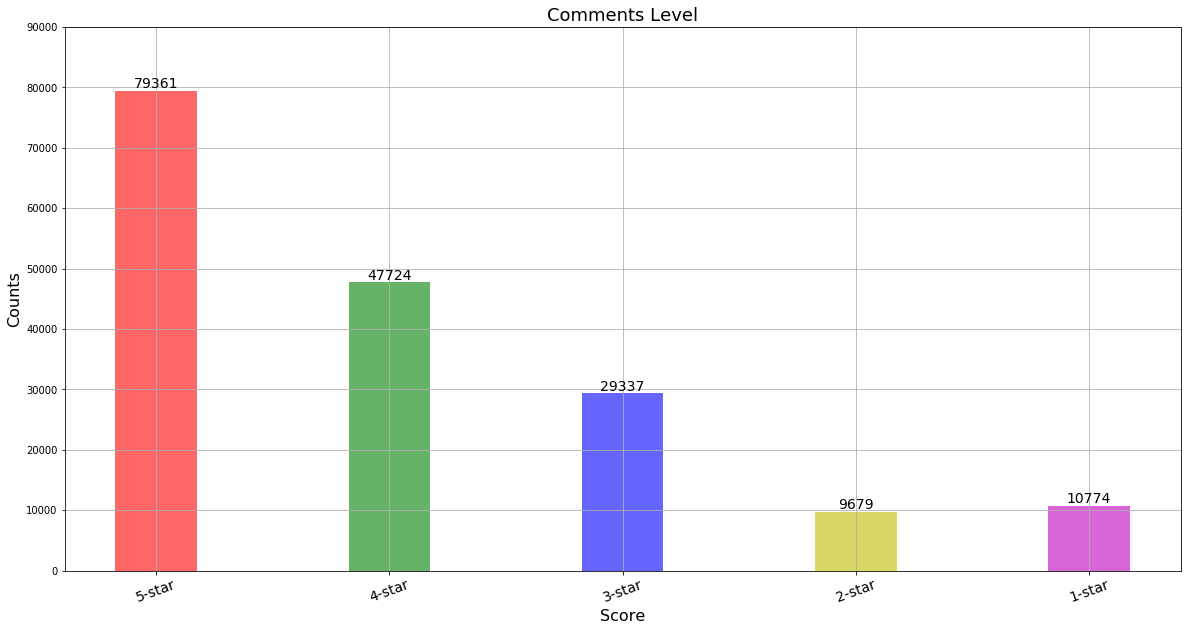

In [17]:
import matplotlib.pyplot as plt
import numpy as np
index = np.arange(5)
score_counts = data['Score'].value_counts()
values = (score_counts[0], score_counts[1], score_counts[2], score_counts[4], score_counts[3])
bar_width = 0.35
plt.figure(figsize=(20, 10))
plt.bar(index, values, bar_width, alpha=0.6, color='rgbym')
plt.xlabel('Score', fontsize=16)  
plt.ylabel('Counts', fontsize=16)
plt.title('Comments Level', fontsize=18)  
plt.xticks(index, ('5-star', '4-star', '3-star', '2-star', '1-star'), fontsize=14, rotation=20)
plt.ylim(0, 90000)
plt.grid()
for idx, value in zip(index, values):
    plt.text(idx, value + 0.1, '%d' % value, ha='center', va='bottom', fontsize=14, color='black')
plt.show()

In [9]:
import re
import jieba
def segment_words(stars):
    comments = None
    if stars == 'all':
        comments = data['Comment']
    else:
        comments = data[data['Score'] == stars]['Comment']
    comments_list = []
    for comment in comments:
        comment = str(comment).strip().replace('span', '').replace('class', '').replace('emoji', '')
        comment = re.compile('1f\d+\w*|[<>/=]').sub('', comment)
        if (len(comment) > 0):
            comments_list.append(comment)
    text = ''.join(comments_list)
    word_list = jieba.cut(text, cut_all=True)
    '''
    stopwords_list = []
    # load chinese stop words
    with open('./data/中文停用词表(1208个).txt') as file:
        for line in file:
            stopwords_list.append(line.strip())
    print(len(stopwords_list))
    with open('./data/停用词表.txt') as file:
        for line in file:
            line = line.strip()
            if line not in stopwords_list:
                stopwords_list.append(line)
    print(len(stopwords_list))
    # remove stop words from word_list
    word_list = [word for word in word_list if word not in stopwords_list]
    '''
    words = ' '.join(word_list)
    return words

In [18]:
from wordcloud import WordCloud, ImageColorGenerator
import PIL.Image as Image
def plot_word_cloud(words):
    coloring = np.array(Image.open('./data/chinese.jpg'))
    wc = WordCloud(background_color='white', max_words=2000, mask=coloring, max_font_size=60, random_state=42, 
                   font_path='./data/DroidSansFallbackFull.ttf', scale=2).generate(words)
    image_color = ImageColorGenerator(coloring)
    plt.figure(figsize=(32, 16))
    plt.imshow(wc.recolor(color_func=image_color))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

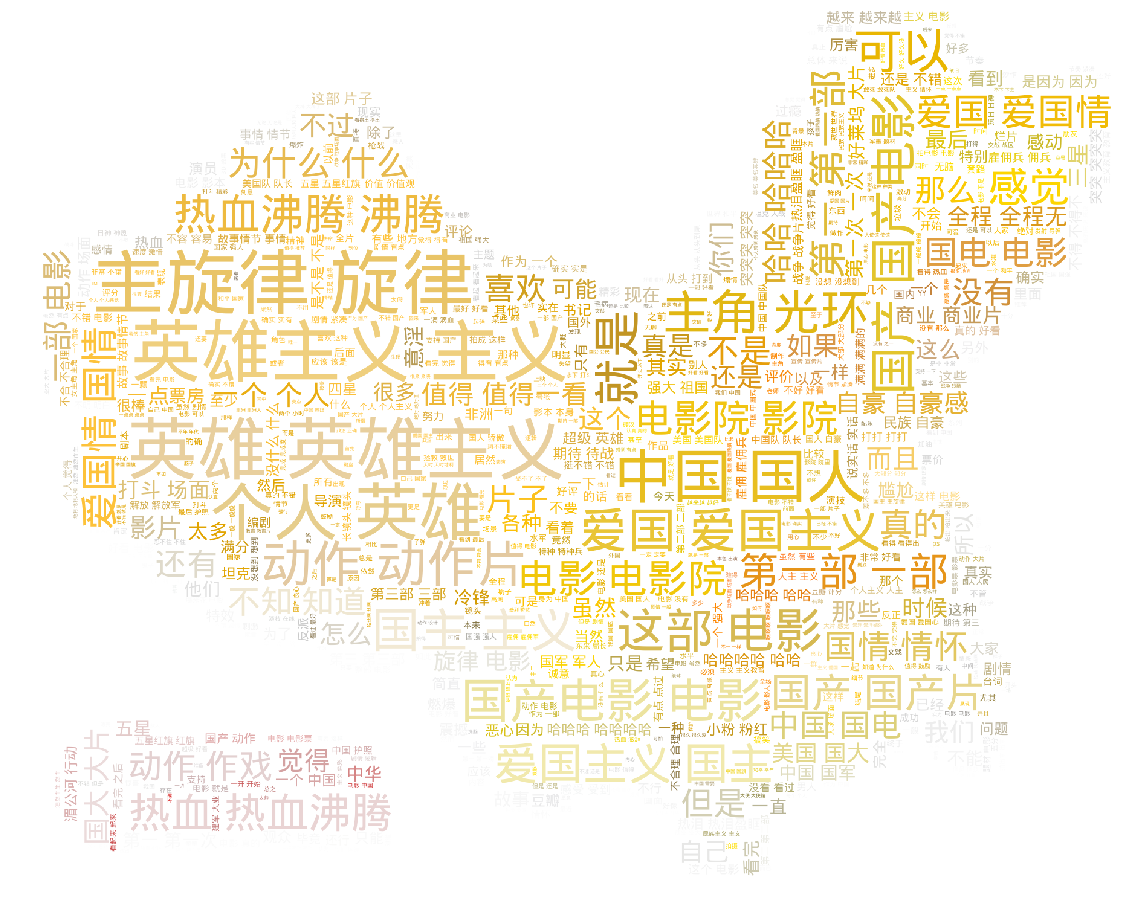

In [19]:
all_words = segment_words('all')
plot_word_cloud(all_words)

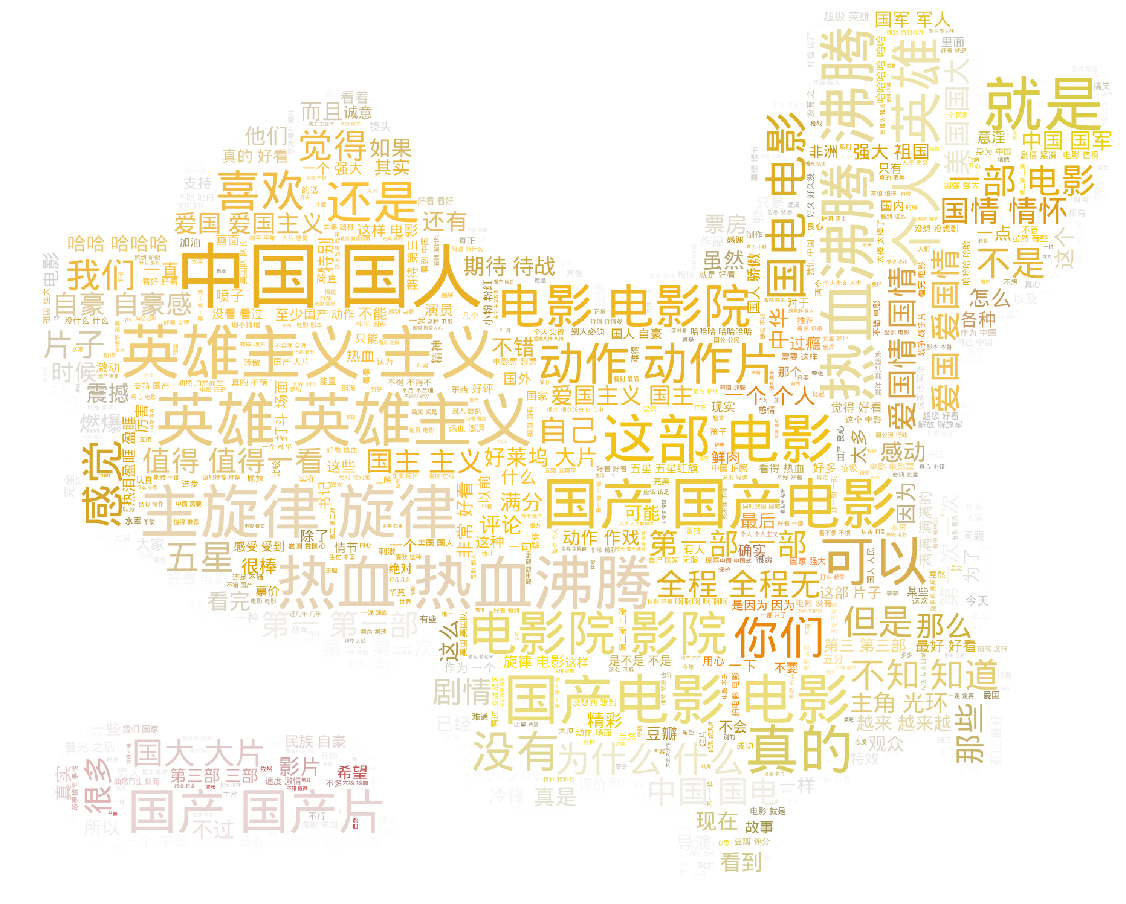

In [20]:
five_start_words = segment_words('力荐')
plot_word_cloud(five_start_words)

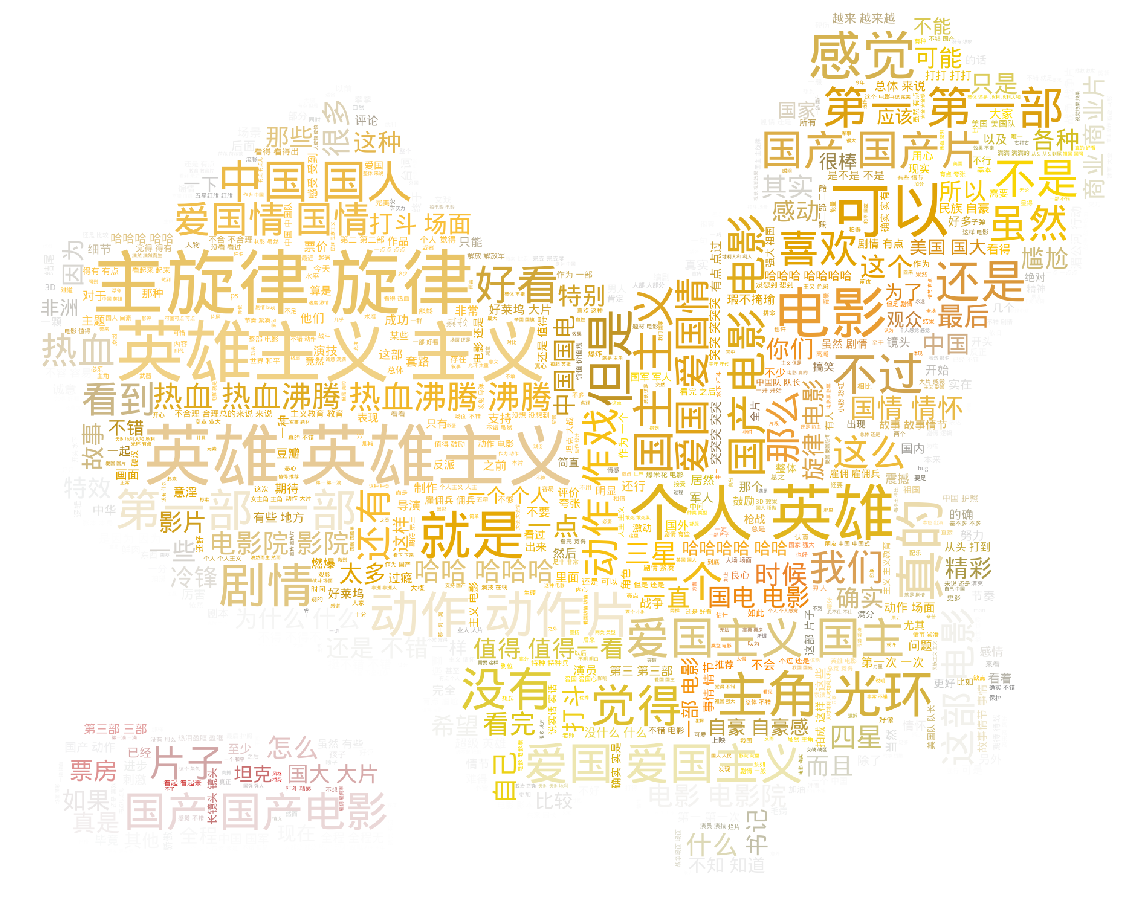

In [21]:
four_start_words = segment_words('推荐')
plot_word_cloud(four_start_words)

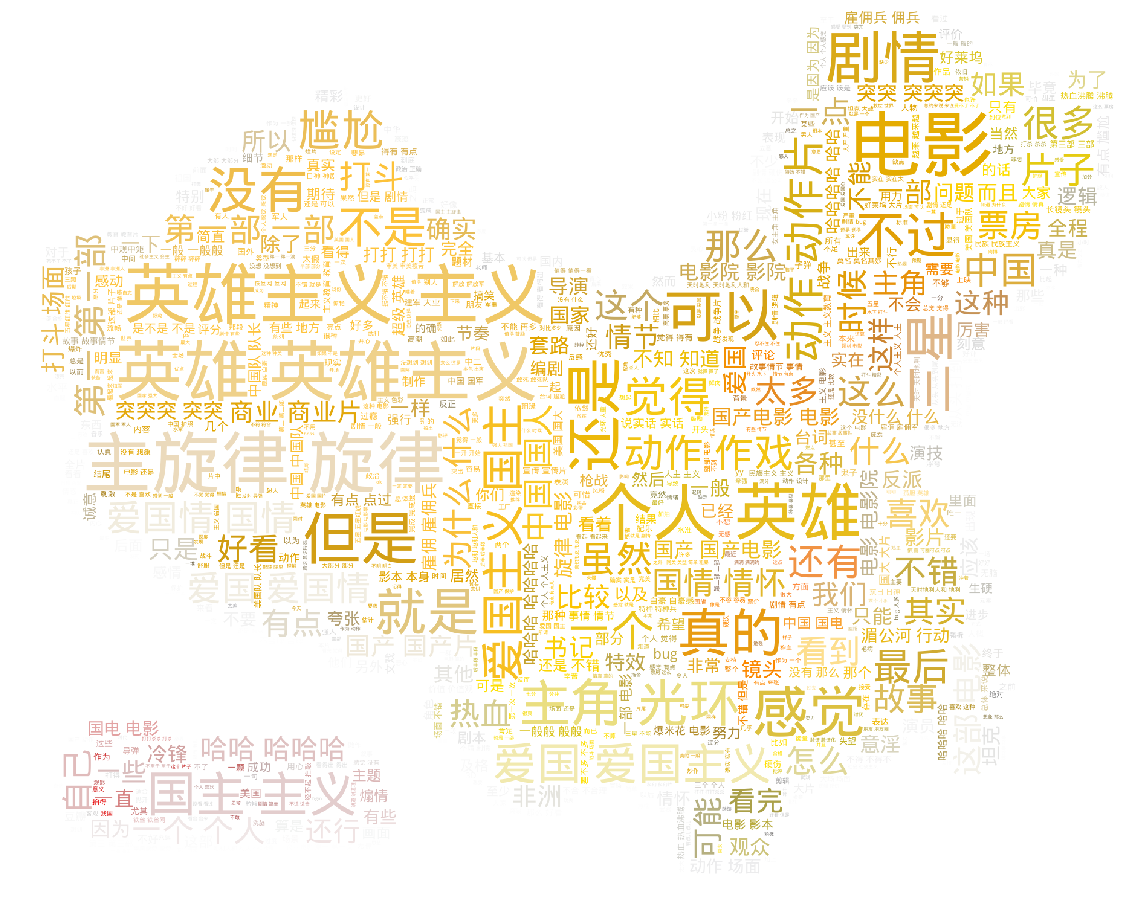

In [22]:
three_start_words = segment_words('还行')
plot_word_cloud(three_start_words)

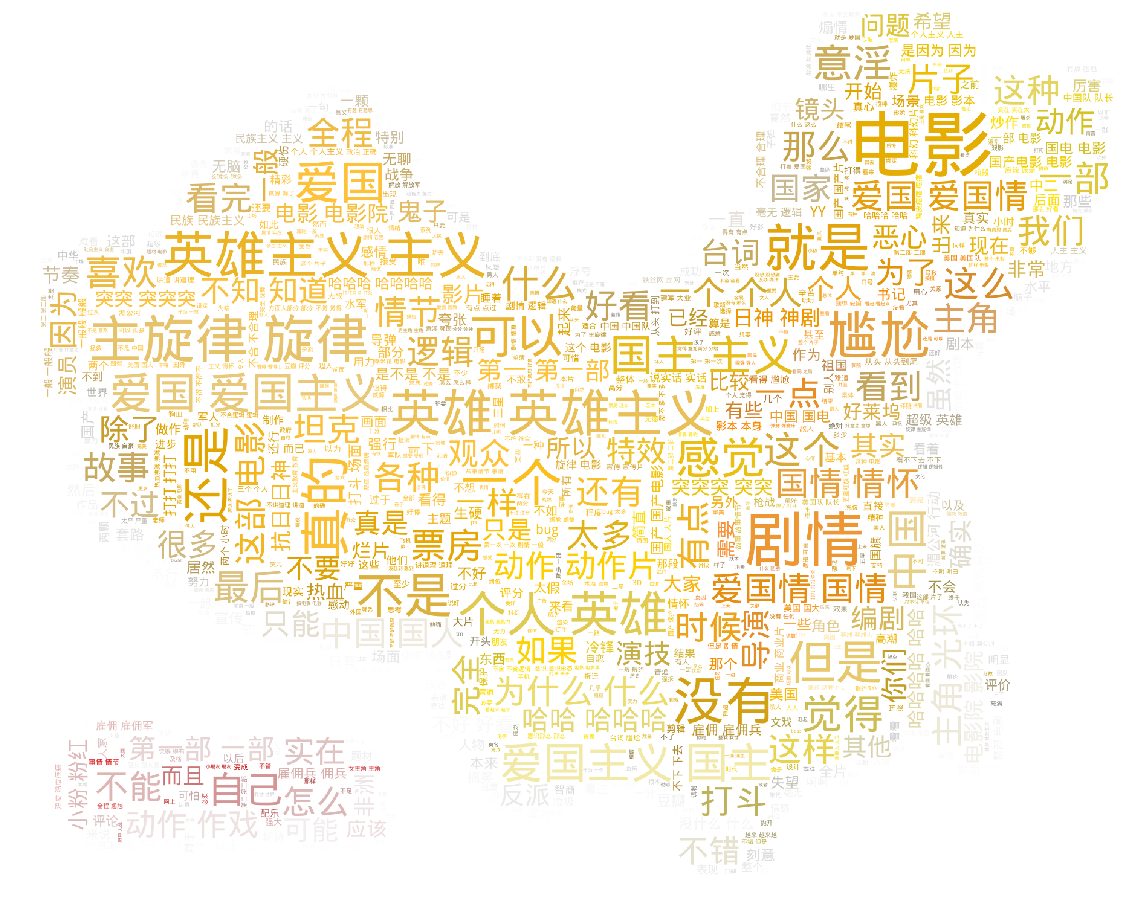

In [23]:
two_start_words = segment_words('较差')
plot_word_cloud(two_start_words)

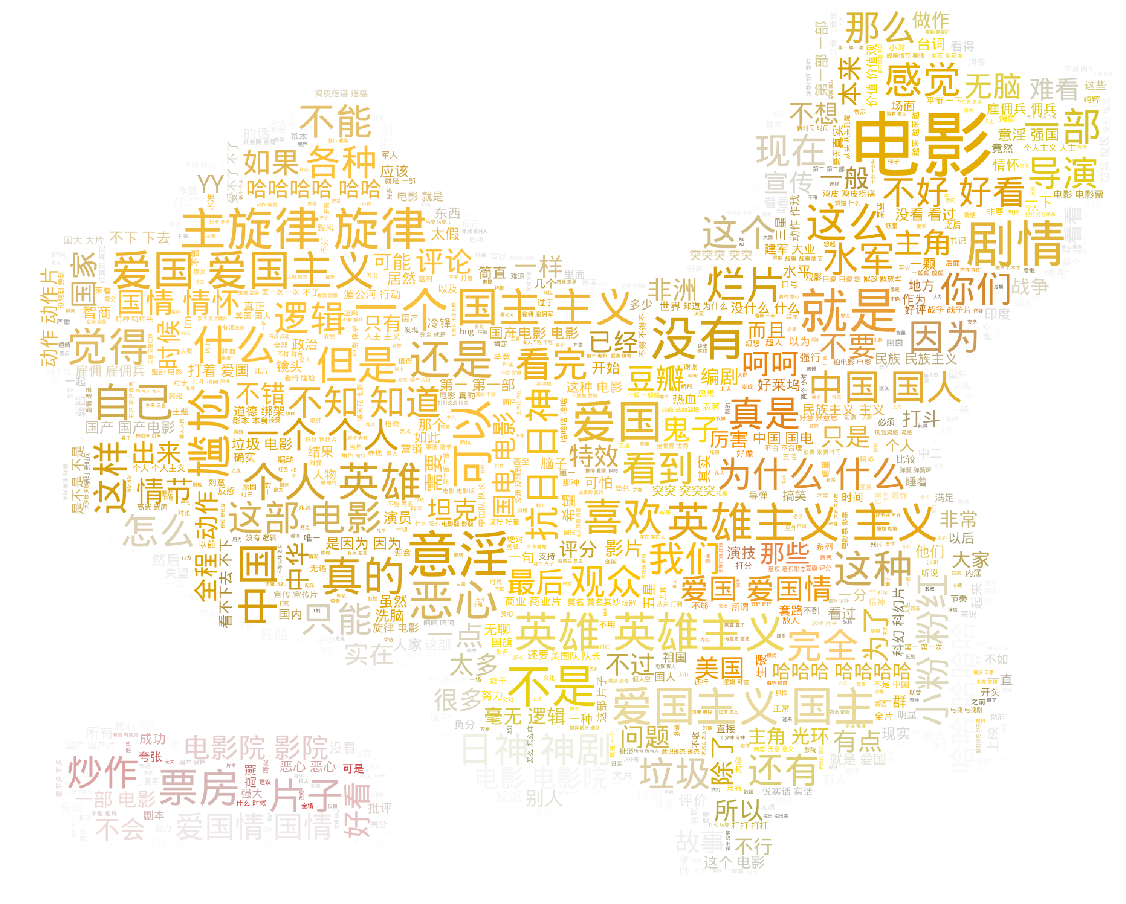

In [24]:
one_start_words = segment_words('很差')
plot_word_cloud(one_start_words)